# 1. 라이브러리 불러오기

In [32]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor

from matplotlib import font_manager,rc
from matplotlib import style
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family = font_name)
style.use('ggplot')

# 2. EDA
## (1)데이터 확인

In [34]:
#load data
data1 = pd.read_csv('movies_test.csv')
data2 = pd.read_csv('movies_train.csv')
pd.set_option('display.max_columns',None) #열 최대로 보기
test = data1.copy()
train = data2.copy()
display(test.head())
display(train.head())

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

###  - 범주형, 연속형 변수 살펴보기

In [47]:
categorical = train.select_dtypes(object).columns

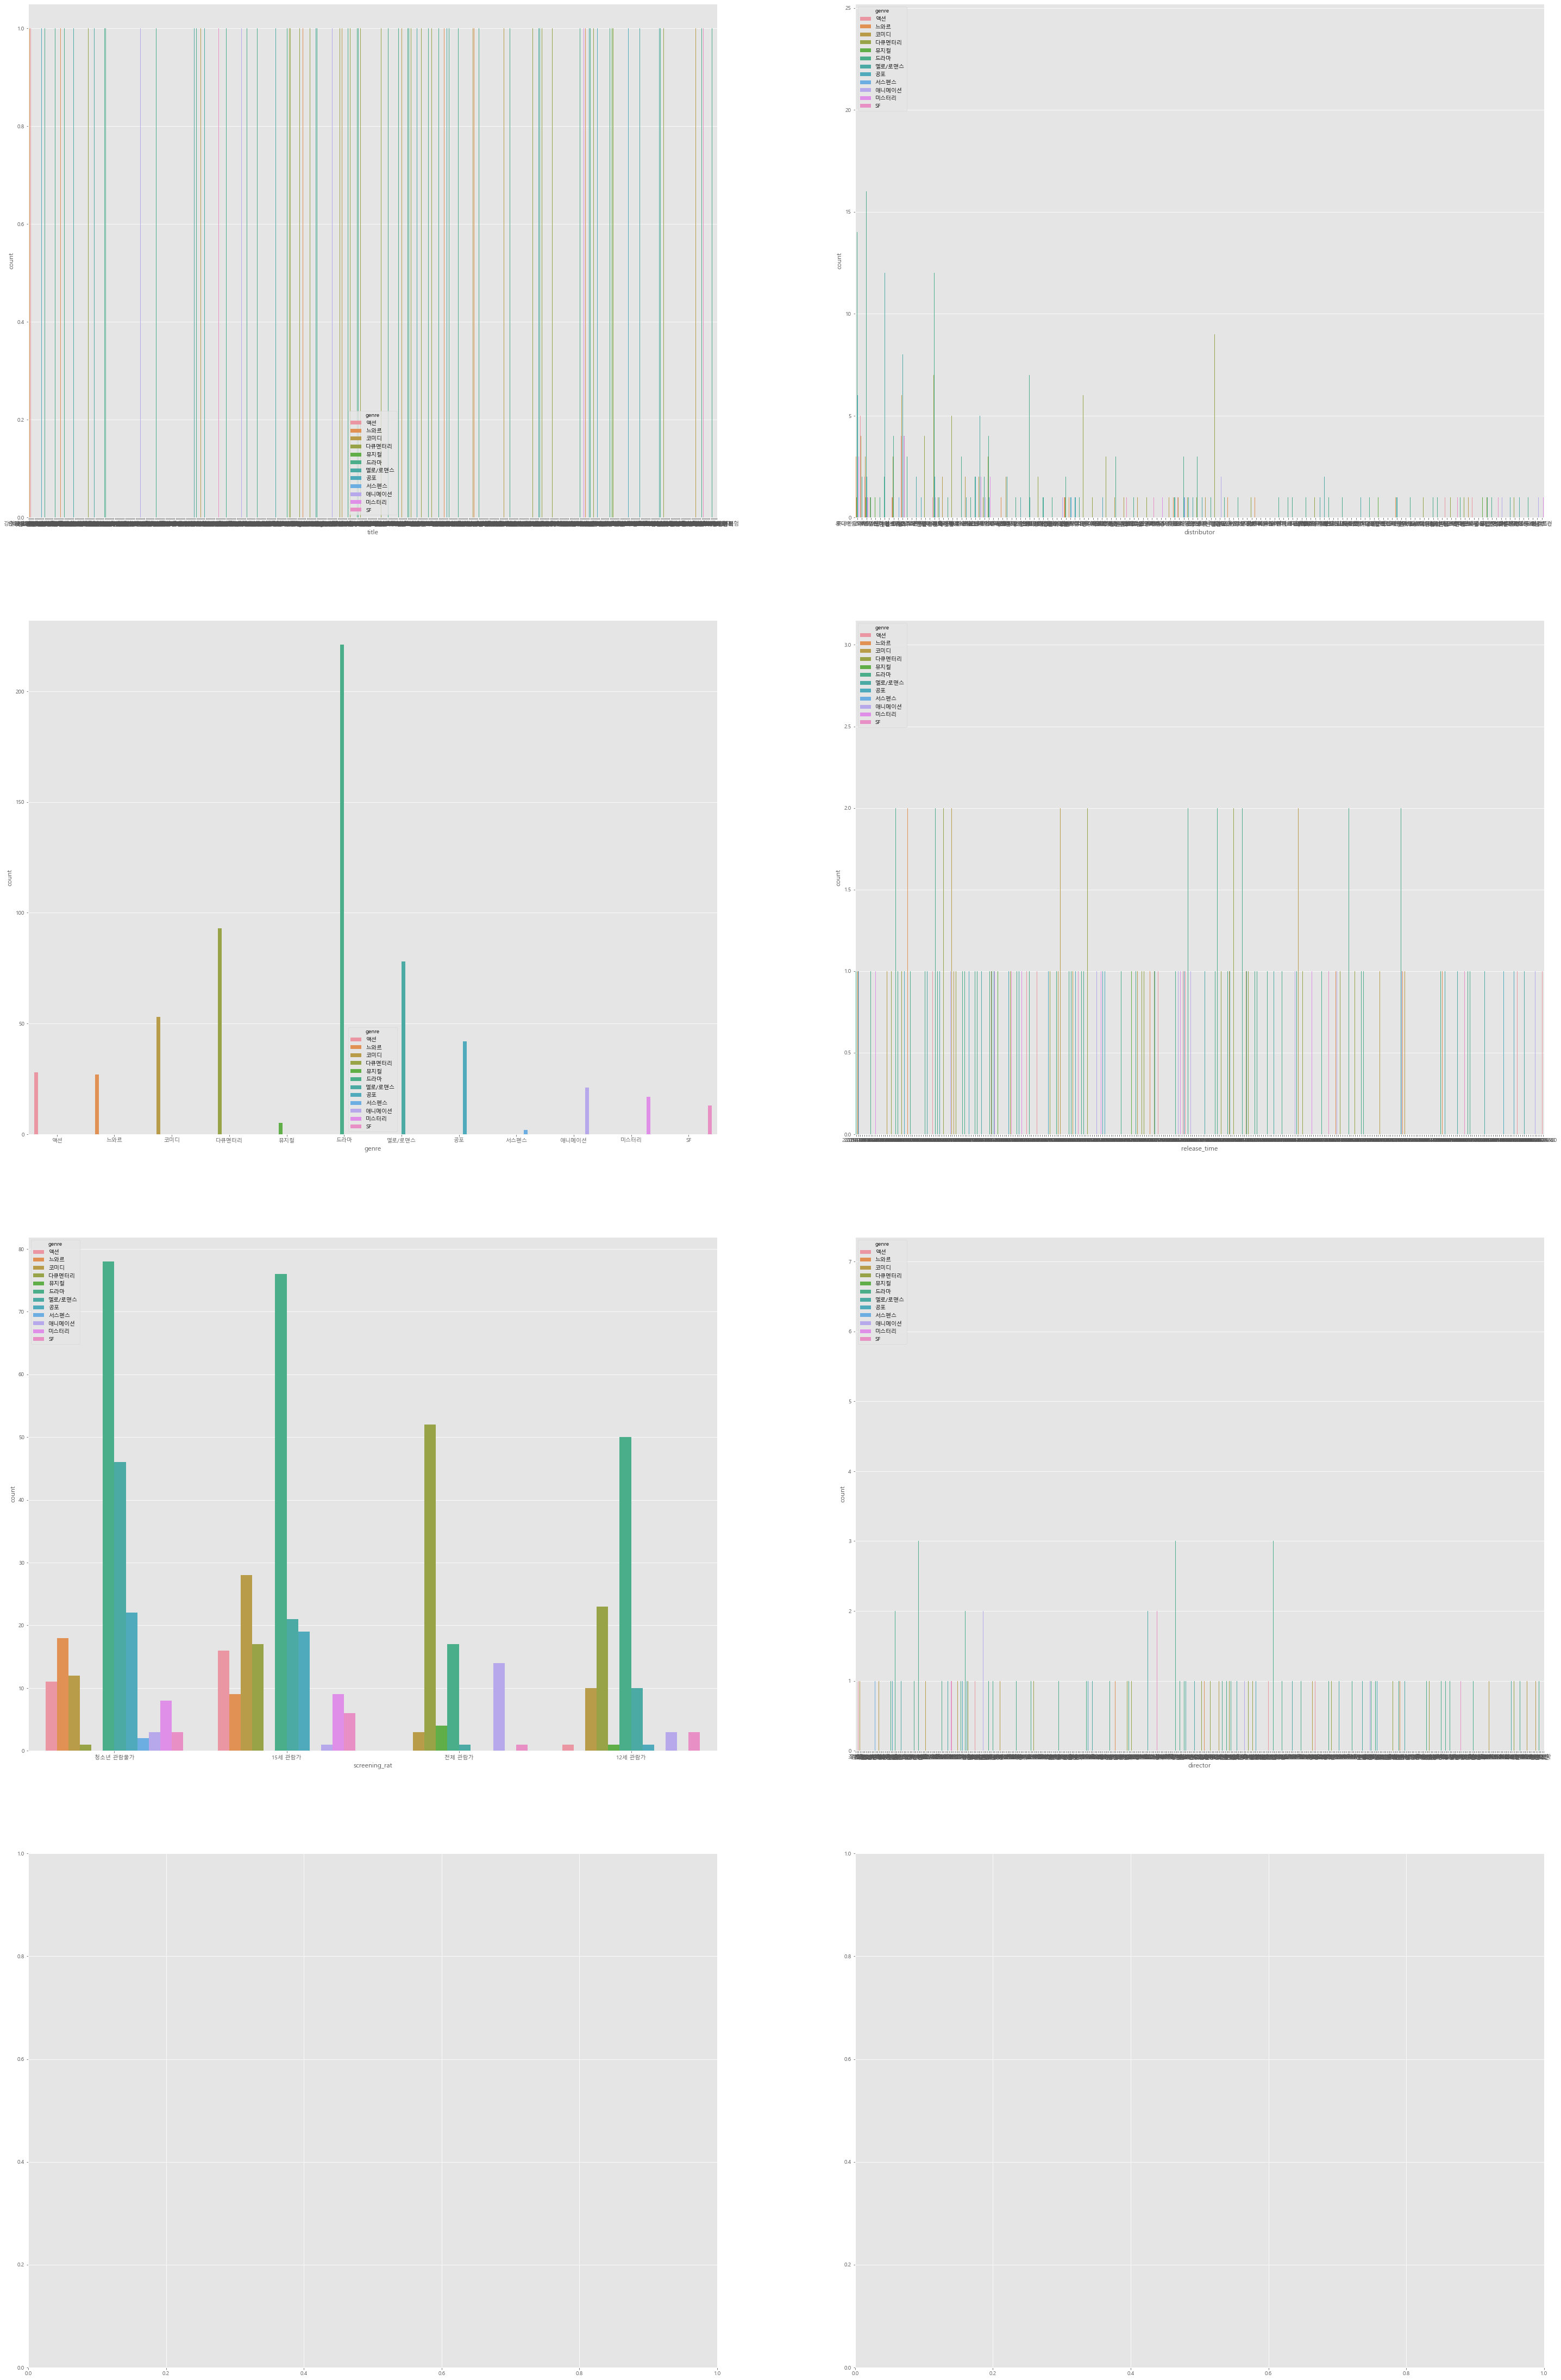

In [78]:
fig, axs = plt.subplots(figsize=(50,80), ncols=2, nrows=4)

for i, feature in enumerate(categorical):
  row=int(i/2)
  col=i%2
  sns.countplot(x=feature,data=train,hue='genre',ax=axs[row][col])

### -group

### - 상관계수

In [36]:
#상관관계
corr_matrix = train.corr()
corr_matrix

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


array([[<AxesSubplot:xlabel='time', ylabel='time'>,
        <AxesSubplot:xlabel='dir_prev_bfnum', ylabel='time'>,
        <AxesSubplot:xlabel='dir_prev_num', ylabel='time'>,
        <AxesSubplot:xlabel='num_staff', ylabel='time'>,
        <AxesSubplot:xlabel='num_actor', ylabel='time'>,
        <AxesSubplot:xlabel='box_off_num', ylabel='time'>],
       [<AxesSubplot:xlabel='time', ylabel='dir_prev_bfnum'>,
        <AxesSubplot:xlabel='dir_prev_bfnum', ylabel='dir_prev_bfnum'>,
        <AxesSubplot:xlabel='dir_prev_num', ylabel='dir_prev_bfnum'>,
        <AxesSubplot:xlabel='num_staff', ylabel='dir_prev_bfnum'>,
        <AxesSubplot:xlabel='num_actor', ylabel='dir_prev_bfnum'>,
        <AxesSubplot:xlabel='box_off_num', ylabel='dir_prev_bfnum'>],
       [<AxesSubplot:xlabel='time', ylabel='dir_prev_num'>,
        <AxesSubplot:xlabel='dir_prev_bfnum', ylabel='dir_prev_num'>,
        <AxesSubplot:xlabel='dir_prev_num', ylabel='dir_prev_num'>,
        <AxesSubplot:xlabel='num_staff', ylabe

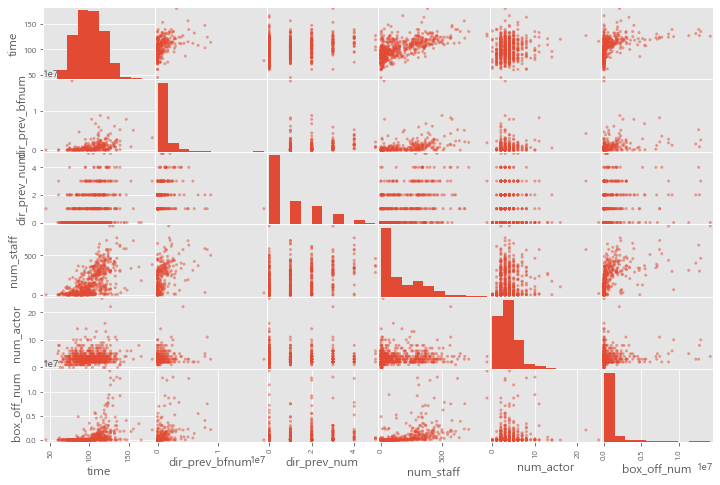

In [37]:
from pandas.plotting import scatter_matrix
attributes = ['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor','box_off_num']
scatter_matrix(train[attributes],figsize = (12,8))

<AxesSubplot:xlabel='num_staff', ylabel='box_off_num'>

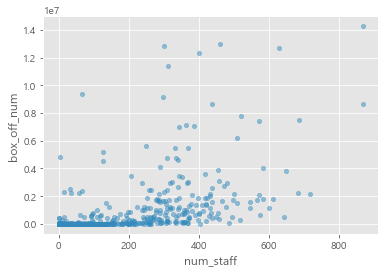

In [49]:
#staff 수와 관람객 수 관계
train.plot(kind = 'scatter',x = 'num_staff', y = 'box_off_num', alpha = 0.5)

<AxesSubplot:xlabel='time', ylabel='box_off_num'>

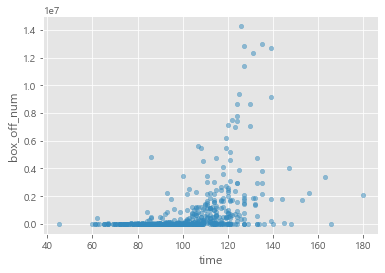

In [50]:
train.plot(kind = 'scatter',x = 'time', y = 'box_off_num', alpha = 0.5)

#### heatmap

<AxesSubplot:>

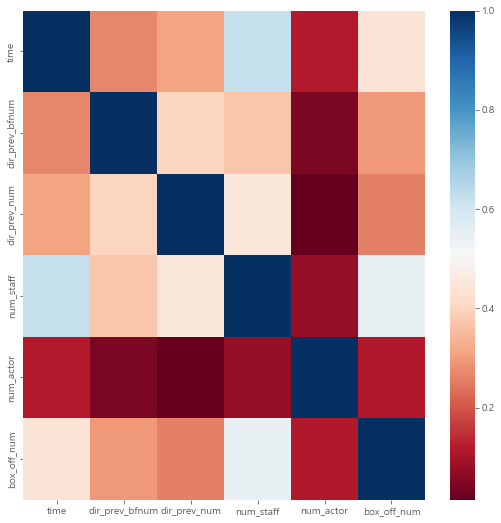

In [44]:
plt.figure(figsize=(9,9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

In [38]:
train.info()
test.info()
train.isnull().sum()
#column name, null값, data type 확인
#dir_prev_bfnum 열에 결측값이 많음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ti

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [39]:
wanna_check_train = ['distributor','genre','release_time','time','screening_rat','director','dir_prev_bfnum','dir_prev_num',
               'num_staff','num_actor','box_off_num']
wanna_check_test = ['distributor','genre','release_time','time','screening_rat','director','dir_prev_bfnum','dir_prev_num',
               'num_staff','num_actor']
print('<train 데이터 확인>')
for i in wanna_check_train:
    print("-----------"+str(i).upper()+"---------")
    print(train.groupby(str(i))[str(i)].value_counts())
    print()
print('*************************************************')
print('<test 데이터 확인>')
for i in wanna_check_test:
    print("-----------"+str(i).upper()+"---------")
    print(test.groupby(str(i))[str(i)].count())
    print()

<train 데이터 확인>
-----------DISTRIBUTOR---------
distributor      distributor    
(주) 브릿지웍스        (주) 브릿지웍스           3
(주) 액티버스엔터테인먼트   (주) 액티버스엔터테인먼트      2
(주) 영화사조제        (주) 영화사조제          10
(주) 영화제작전원사      (주) 영화제작전원사         3
(주) 케이알씨지        (주) 케이알씨지          14
(주)JK필름          (주)JK필름             1
(주)NEW           (주)NEW             30
(주)고앤고 필름        (주)고앤고 필름           1
(주)노버스엔터테인먼트     (주)노버스엔터테인먼트        1
(주)대명문화공장        (주)대명문화공장           1
(주)더픽쳐스          (주)더픽쳐스             1
(주)두타연           (주)두타연              1
(주)드림팩트엔터테인먼트    (주)드림팩트엔터테인먼트       1
(주)랠리버튼          (주)랠리버튼             1
(주)레인보우 팩토리      (주)레인보우 팩토리         1
(주)로드하우스         (주)로드하우스            1
(주)리틀빅픽처스        (주)리틀빅픽처스           2
(주)마운틴픽쳐스        (주)마운틴픽쳐스          29
(주)마인스 엔터테인먼트    (주)마인스 엔터테인먼트       3
(주)마인스엔터테인먼트     (주)마인스엔터테인먼트        2
(주)미디어데이         (주)미디어데이            1
(주)쇼박스           (주)쇼박스             26
(주)스마일이엔티        (주)스마일이엔티           1
(주)스톰픽쳐스코리아      (주)스톰픽

In [ ]:
fig, ax = plt.subplots(1,2,  figsize=(30,13) )
sns.countplot(data=train,x='reality', ax=ax[0])
sns.barplot(x='reality', y='index', hue='credit', data=train.groupby(['reality', 'credit'])[['index']].count().reset_index(), ax=ax[1])

for a in ax:
  for p in a.patches:
    a.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
           p.get_y() + p.get_height()+15,   # 세로 위치
           f"{p.get_height():.0f}",     # 값 + 표시방법 소수 둘째자리까지 
           ha = 'center', size=15 )   # 좌우정렬 중간으로

plt.show()

### -결측값 처리

In [40]:
train['dir_prev_bfnum'].isnull().sum()

330

'dir_prev_bfnum'가 NULL인 데이터들의 'dir_prev_num'를 알아보자.

*dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수

In [41]:
train[train['dir_prev_bfnum'].isnull()].groupby('dir_prev_num')['dir_prev_num'].count()

dir_prev_num
0    330
Name: dir_prev_num, dtype: int64

감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수가 0이므로<br>
영화 제작 전 평균 관객수도 당연히!! 0

→ 결측값을 0으로 대체한다.

In [42]:
train['dir_prev_bfnum']= train['dir_prev_bfnum'].fillna(0)
test['dir_prev_bfnum']= test['dir_prev_bfnum'].fillna(0)

In [43]:
train['dir_prev_bfnum'].isnull().sum()

0

### - 이상치 처리

연속형 변수

AxesSubplot(0.125,0.125;0.775x0.755)


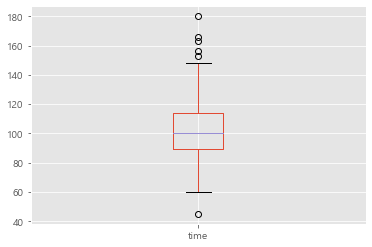

AxesSubplot(0.125,0.125;0.775x0.755)


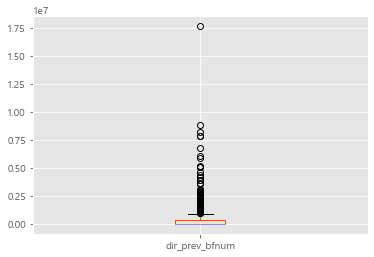

AxesSubplot(0.125,0.125;0.775x0.755)


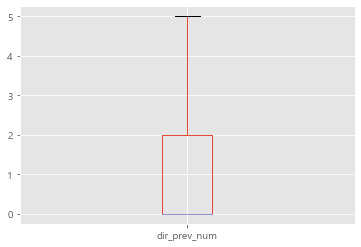

AxesSubplot(0.125,0.125;0.775x0.755)


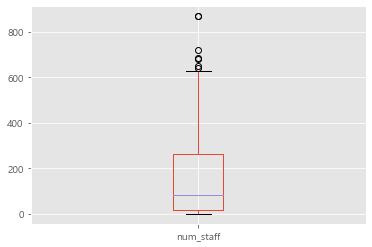

AxesSubplot(0.125,0.125;0.775x0.755)


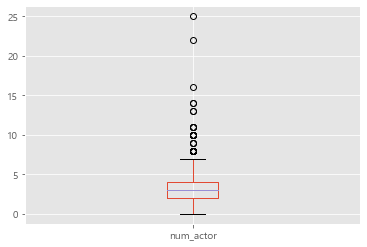

AxesSubplot(0.125,0.125;0.775x0.755)


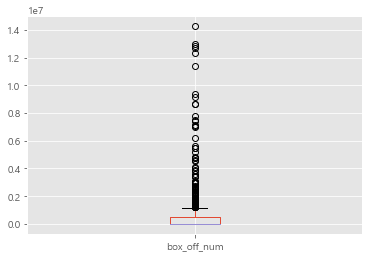

In [84]:
wanna_check_box = ['time','dir_prev_bfnum','dir_prev_num',
               'num_staff','num_actor','box_off_num']

for i in wanna_check_box:
    print(train[[i]].boxplot())
    plt.show()

### - 데이터 수정

In [51]:
train['distributor'] = train.distributor.str.replace("(주)", '')
test['distributor'] = test.distributor.str.replace("(주)", '')

# 3. Feature Engineering

#### - 장르별 영화 관객수 평균값으로 랭크 인코딩

In [56]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

#### -배급사별 영화 관객수 중위값 기준으로 배급사 랭크 인코딩

In [71]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [72]:
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

In [73]:
tr_nm_median = train.groupby('distributor').box_off_num.median().sort_values()
print(tr_nm_median)
tr_nm_mean= train.groupby('distributor').box_off_num.mean().sort_values()
print(tr_nm_mean)

distributor
인피니티엔터테인먼트               2.0
고구마공작소                   8.0
사람과 사람들                 42.0
위드시네마                   46.0
나우콘텐츠                   54.0
한국YWCA연합회               71.0
인터콘미디어                  79.0
위더스필름                   90.0
()씨엠닉스                 136.0
건시네마                   162.0
에스와이코마드                163.0
ysfilm                 172.0
크리에이티브컴즈()             188.0
()휘엔터테인먼트              228.0
()유비네트워크               303.0
()온비즈넷                 310.0
이상우필름                  339.0
()더픽쳐스                 429.0
판다미디어                  432.0
웃기씨네                   464.5
프로젝트 엠피                482.0
디마엔터테인먼트               484.0
마법사필름                  555.0
쟈비스미디어                 588.0
골든타이드픽처스               599.0
하준사                    600.0
() 액티버스엔터테인먼트          610.0
마노엔터테인먼트               613.0
() 케이알씨지               629.5
두 엔터테인먼트               647.0
제나두 엔터테인먼트             678.0
팜코리아미디어                721.0
동국대학교 충무로영상제작센터        742.0
이모션 픽처스                791.0
()

In [74]:
tr_nm_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'distribution_rank').sort_values(by = 'distribution_rank')
tr_nm_rank

,distributor,distribution_rank
125,인피니티엔터테인먼트,2.0
51,고구마공작소,8.0
79,사람과 사람들,42.0
115,위드시네마,46.0
54,나우콘텐츠,54.0
149,한국YWCA연합회,71.0
124,인터콘미디어,79.0
114,위더스필름,90.0
19,()씨엠닉스,136.0
50,건시네마,162.0


In [75]:
tr_nm_rank['distribution_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,distributor,distribution_rank
125,인피니티엔터테인먼트,1
51,고구마공작소,2
79,사람과 사람들,3
115,위드시네마,4
54,나우콘텐츠,5
149,한국YWCA연합회,6
124,인터콘미디어,7
114,위더스필름,8
19,()씨엠닉스,9
50,건시네마,10


In [76]:
#데이터 합치기
train = pd.merge(train, tr_nm_rank, how = 'left')
test = pd.merge(test, tr_nm_rank, how = 'left')

#### - 텍스트와 범주형 특성

In [89]:
train_cat = [['genre'],['release_time'],['screening_rat'],['director']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for i in train_cat:
    train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]

array([[1.],
       [2.],
       [3.],
       [0.]])

In [91]:
ordinal_encoder.categories_

[array(['director', 'genre', 'release_time', 'screening_rat'], dtype=object)]

In [93]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [94]:
cat_encoder.categories_

[array(['director', 'genre', 'release_time', 'screening_rat'], dtype=object)]

# 4. 모델 선택 및 훈련

## LGBMRegressor

In [99]:
!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
lgbm = LGBMRegressor(random_state = 518)

In [101]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

NameError: name 'KFold' is not defined

In [100]:
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

np.mean(rmse_list)

NameError: name 'kf' is not defined

In [104]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train,)

TypeError: fit() missing 1 required positional argument: 'y'